In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as mp
from math import nan
from sklearn import metrics

In [2]:
file_path = r'C:\Users\kalya\OneDrive - University of Illinois at Chicago\!UIC\!Semesters\3rd Sem\CS 583 Data Mining and Text Mining\Assignements\Assignment 3'

In [3]:
temp = np.loadtxt(fname = os.path.join(file_path, 'AS3_Sample3.txt'), delimiter= '\n', dtype= str)
data_temp = [i.replace('{','').replace('}', '').split(', ') for i in temp]
data = [[float(i) for i in j] for j in data_temp]
#data

In [4]:
# data = np.loadtxt(fname = os.path.join(file_path, 'Book1.csv'), delimiter= ',', skiprows = 1)
# k = 1
# for i in data:
#     print(str(k) + ', ' + str(i[0]) + ', ' + str(int(i[1])))
#     k += 1
    

In [5]:
# def predicted_class(data, threshold):
#     temp =[]
#     for i in data:
#         if i[1]>threshold:
#             temp.append(i + [1.0])
#         else:
#             temp.append(i + [0.0])
#     return temp

# data2= predicted_class(data, 0.5)
# data2        

In [6]:
def predicted_class(data, threshold):
    data_t = np.transpose(data)
    temp  = []
    temp2 = []
    temp3 = []
    for i in data_t[0]:
        if i>=threshold:
            temp.append('A')
        else:
            temp.append('B')
    for j in data_t[1]:
        if j == 1.0:
            temp3.append('A')
        else:
            temp3.append('B')  
            
    temp2.append(data_t[0])
    temp2.append(temp3)
    temp2.append(temp)

    return np.asarray(temp2)

data2= predicted_class(np.asarray(data)[:,1:], 0.5)
data2

array([['0.639816239', '0.490992931', '0.623814545', ..., '0.366942846',
        '0.463990116', '0.710103945'],
       ['A', 'B', 'A', ..., 'B', 'B', 'A'],
       ['A', 'B', 'A', ..., 'B', 'B', 'A']], dtype='<U32')

# The rows are actual and columns are predicted
# The first row is positive and second one is of negative class. The same for columns

In [7]:
def evaluation_metrics(data_t, threshold):
    data = predicted_class(data_t, threshold)

# CONFUSION Matrix 
    actual_Classes = data[-2]    
    predicted_Classes = data[-1] 
    class_uniq = np.unique(actual_Classes)
#     print(class_uniq)
    n = len(class_uniq)
    conf = np.zeros((n,n))

    for i in range(len(class_uniq)):
        for j in range(len(class_uniq)):

            conf[i, j] = np.sum((actual_Classes == class_uniq[i]) & (predicted_Classes == class_uniq[j]))
    
# Evaluation Metrics
    EM = {}
    EM['accuracy'] = round(sum(np.diagonal(conf))/len(data[0]),3)
    EM['prec_positive'] = round(conf[0][0]/sum(conf[:,0]),3)
    temp_rec = round(conf[0][0]/sum(conf[0,:]),3)
    temp_func = lambda temp: 0 if bool(np.isnan(temp))  else temp
    EM['rec_positive'] = temp_func(temp_rec)
#     print(EM['rec_positive'])
    EM['F1_positive'] = temp_func(round((2*EM['prec_positive']*EM['rec_positive'])/(EM['prec_positive']+EM['rec_positive']),3))
    EM['TPR'] = EM['rec_positive']
    EM['sensitivity'] = EM['rec_positive']
    EM['TNR'] = temp_func(round(conf[1][1]/sum(conf[1,:]),3))
    EM['specificity'] = EM['TNR']
    EM['FPR'] = temp_func(round(1 - EM['TNR'],3))
    return EM, conf


EM, conf = evaluation_metrics(np.asarray(data)[:,1:], 0.5)
conf

array([[313., 185.],
       [144., 358.]])

In [43]:
EM

{'accuracy': 0.671,
 'prec_positive': 0.685,
 'rec_positive': 0.629,
 'F1_positive': 0.656,
 'TPR': 0.629,
 'sensitivity': 0.629,
 'TNR': 0.713,
 'specificity': 0.713,
 'FPR': 0.287}

In [44]:
data_np = np.asarray(data)
ind=np.argsort(data_np[:,-2])

data_sorted=data_np[ind][::-1][:,1:]
data_sorted

array([[0.86098878, 1.        ],
       [0.85141393, 1.        ],
       [0.82287656, 1.        ],
       ...,
       [0.23463959, 0.        ],
       [0.19600383, 0.        ],
       [0.19234598, 0.        ]])

In [47]:
def ROC(data):
    data_np = np.asarray(data)
    ind=np.argsort(data_np[:,-2])
    data_sorted=data_np[ind][:,1:]
    a = []
    for i in range(len(data_sorted)):
        thres = data_sorted[i][0]
        EM_temp = evaluation_metrics(data_sorted, thres)[0]
        b =[EM_temp['FPR'], EM_temp['TPR']]
        a.append(b) 
    return np.transpose(a)
        
        

a = ROC(data)

In [48]:
a

array([[1.   , 0.998, 0.996, ..., 0.   , 0.   , 0.   ],
       [1.   , 1.   , 1.   , ..., 0.006, 0.004, 0.002]])

In [49]:
# def ROC(data, inc):
#     t = 0
#     a = []
#     while t <= 1:
#         EM_temp = evaluation_metrics(data, t)[0]
#         b =[EM_temp['FPR'], EM_temp['TPR']]
#         a.append(b)
#         t += inc
#     return a

# a = np.transpose(ROC(data, 0.01))


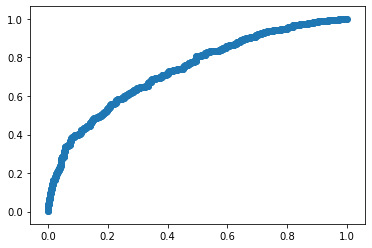

In [50]:
mp.scatter(a[0], a[1])

# Using Trapeziodal principle to find the area under the roc curve

In [51]:
def auc(a):
    area = 0
    for i in range(len(a[0])-1):
#         print(i)
        area += abs((a[0][i+1] - a[0][i])*(a[1][i+1] + a[1][i]))/2
    return round(area,3)

auc(a)
        

0.738

In [53]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score

In [55]:
np.unique(data2[1])

array(['A', 'B'], dtype='<U32')

In [53]:
precision_score(data2[1], data2[2], average  = None)

array([0.68138248, 0.66087894])

In [55]:
recall_score(data2[1], data2[2], average  = None)

array([0.64056352, 0.7004696 ])

In [11]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as mp

def EM_assignment3(file_path, sampletxt):
    
# Predicting the classes based on the given probabilities
    def predicted_class(data, threshold):
        data_t = np.transpose(data)
        temp  = []
        temp2 = []
        temp3 = []
        for i in data_t[0]:
            if i>=threshold:
                temp.append('A')
            else:
                temp.append('B')
        for j in data_t[1]:
            if j == 1.0:
                temp3.append('A')
            else:
                temp3.append('B')  

        temp2.append(data_t[0])
        temp2.append(temp3)
        temp2.append(temp)

        return np.asarray(temp2)

    def evaluation_metrics(data_t, threshold):
        data = predicted_class(data_t, threshold)

    # CONFUSION Matrix 
        actual_Classes = data[-2]    
        predicted_Classes = data[-1] 
        class_uniq = np.unique(actual_Classes)
    #     print(class_uniq)
        n = len(class_uniq)
        conf = np.zeros((n,n))

        for i in range(len(class_uniq)):
            for j in range(len(class_uniq)):
                conf[i, j] = np.sum((actual_Classes == class_uniq[i]) & (predicted_Classes == class_uniq[j]))

# The rows are actual and columns are predicted
# The first row is positive and second one is of negative class. The same for columns            

    # Evaluation Metrics
        EM = {}
        EM['accuracy'] = round(sum(np.diagonal(conf))/len(data[0]),3)
        EM['prec_positive'] = round(conf[0][0]/sum(conf[:,0]),3)
        temp_rec = round(conf[0][0]/sum(conf[0,:]),3)
        temp_func = lambda temp: 0 if bool(np.isnan(temp))  else temp
        EM['rec_positive'] = temp_func(temp_rec)

        EM['F1_positive'] = temp_func(round((2*EM['prec_positive']*EM['rec_positive'])/(EM['prec_positive']+EM['rec_positive']),3))
        EM['TPR'] = EM['rec_positive']
        EM['sensitivity'] = EM['rec_positive']
        EM['TNR'] = temp_func(round(conf[1][1]/sum(conf[1,:]),3))
        EM['specificity'] = EM['TNR']
        EM['FPR'] = temp_func(round(1 - EM['TNR'],3))
        return EM, conf

    def ROC(data):
        data_np = np.asarray(data)
        ind=np.argsort(data_np[:,-2])
        data_sorted=data_np[ind][:,1:]
#         print(data_sorted)
        a = []
        for i in range(len(data_sorted)):
            thres = data_sorted[i][0]
            EM_temp = evaluation_metrics(data_sorted, thres)[0]
            b =[EM_temp['FPR'], EM_temp['TPR']]
            a.append(b) 
        return np.transpose(a)

    
    def auc(a):

# Using Trapeziodal principle to find the area under the roc curve

        area = 0
        for i in range(len(a[0])-1):
            area += abs((a[0][i+1] - a[0][i])*(a[1][i+1] + a[1][i]))/2
        return round(area,3)
    
# Loading the data from the given text file    

    temp = np.loadtxt(fname = os.path.join(file_path, sampletxt), delimiter= '\n', dtype= str)
    data_temp = [i.replace('{','').replace('}', '').split(', ') for i in temp]
    data = [[float(i) for i in j] for j in data_temp]

    # data2= predicted_class(data, 0.5)
    EM, conf = evaluation_metrics(np.asarray(data)[:,1:], 0.5)

    a = ROC(data)
    
    print('(')
    print('(Accuracy ' + str(EM['accuracy']) + ')')
    print('(Precision ' + str(EM['prec_positive']) + ')')
    print('(Recall ' + str(EM['rec_positive']) + ')')
    print('(F1 ' + str(EM['F1_positive']) + ')')
    print('(TPR ' + str(EM['TPR']) + ')')
    print('(FPR ' + str(EM['FPR']) + ')')
    print('(Specificity ' + str(EM['specificity']) + ')')
    print('(Sensitivity ' + str(EM['sensitivity']) + ')')
    print('(AUC ' + str(auc(a)) + ')')
    print(')')

file_path = r'C:\Users\kalya\OneDrive - University of Illinois at Chicago\!UIC\!Semesters\3rd Sem\CS 583 Data Mining and Text Mining\Assignements\Assignment 3'
EM_assignment3(file_path, 'AS3_Sample3.txt')


(
(Accuracy 0.671)
(Precision 0.685)
(Recall 0.629)
(F1 0.656)
(TPR 0.629)
(FPR 0.287)
(Specificity 0.713)
(Sensitivity 0.629)
(AUC 0.738)
)
